# Setting up the notebook

In [9]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from IPython.display import HTML
from numpy import sqrt, cos, sin, tan

# Plotting linear transformations on sets of points

In [10]:
# Creating a set of vectors arranged on a circle to vizualize

R = 1.0 # radius the points will sit at. 
N_POINTS = 60 # the number of points to draw
theta = np.linspace(0, 2*np.pi, N_POINTS, endpoint=False) # angles for the points
V_sel = [0, 15] # Special points to fully draw the vectors  

# Defining the set of vectors, one at each theta
V = np.array([(R*np.cos(i), R*np.sin(i)) for i in theta]).T

# Picking some pretty colors to use for the points
hsv = cm.get_cmap('hsv', N_POINTS)
colors = list(hsv(range(N_POINTS)))

In [11]:
theta

array([0.        , 0.10471976, 0.20943951, 0.31415927, 0.41887902,
       0.52359878, 0.62831853, 0.73303829, 0.83775804, 0.9424778 ,
       1.04719755, 1.15191731, 1.25663706, 1.36135682, 1.46607657,
       1.57079633, 1.67551608, 1.78023584, 1.88495559, 1.98967535,
       2.0943951 , 2.19911486, 2.30383461, 2.40855437, 2.51327412,
       2.61799388, 2.72271363, 2.82743339, 2.93215314, 3.0368729 ,
       3.14159265, 3.24631241, 3.35103216, 3.45575192, 3.56047167,
       3.66519143, 3.76991118, 3.87463094, 3.97935069, 4.08407045,
       4.1887902 , 4.29350996, 4.39822972, 4.50294947, 4.60766923,
       4.71238898, 4.81710874, 4.92182849, 5.02654825, 5.131268  ,
       5.23598776, 5.34070751, 5.44542727, 5.55014702, 5.65486678,
       5.75958653, 5.86430629, 5.96902604, 6.0737458 , 6.17846555])

In [12]:
V

array([[ 1.00000000e+00,  9.94521895e-01,  9.78147601e-01,
         9.51056516e-01,  9.13545458e-01,  8.66025404e-01,
         8.09016994e-01,  7.43144825e-01,  6.69130606e-01,
         5.87785252e-01,  5.00000000e-01,  4.06736643e-01,
         3.09016994e-01,  2.07911691e-01,  1.04528463e-01,
         6.12323400e-17, -1.04528463e-01, -2.07911691e-01,
        -3.09016994e-01, -4.06736643e-01, -5.00000000e-01,
        -5.87785252e-01, -6.69130606e-01, -7.43144825e-01,
        -8.09016994e-01, -8.66025404e-01, -9.13545458e-01,
        -9.51056516e-01, -9.78147601e-01, -9.94521895e-01,
        -1.00000000e+00, -9.94521895e-01, -9.78147601e-01,
        -9.51056516e-01, -9.13545458e-01, -8.66025404e-01,
        -8.09016994e-01, -7.43144825e-01, -6.69130606e-01,
        -5.87785252e-01, -5.00000000e-01, -4.06736643e-01,
        -3.09016994e-01, -2.07911691e-01, -1.04528463e-01,
        -1.83697020e-16,  1.04528463e-01,  2.07911691e-01,
         3.09016994e-01,  4.06736643e-01,  5.00000000e-0

In [13]:
# Defining some functions to plot the points and special points in the transformation

def plot_points(points, sel=None, colors='blue', marker='o', size=10.0, alpha=1.0, zorder=0, figsize=(5,5), ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        
    if not isinstance(colors, list):
        colors = len(points[0]) * [colors]   
        
    out = ax.scatter(points[0,:], points[1,:], c=colors, marker=marker, s=size, alpha=alpha, zorder=zorder)
    
    if sel is not None:
        for i in V_sel:
            ax.plot([0,points[0][i]], [0, points[1][i]], color=colors[i], linewidth=3, alpha=alpha)
    
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))
    ax.set_aspect('equal')
    return(ax, out)

(-3.0, 3.0)

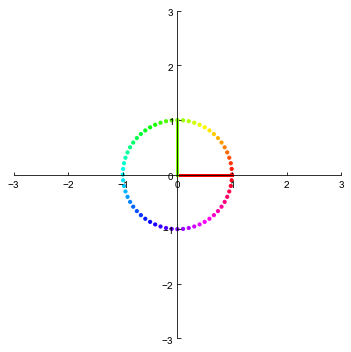

In [16]:
# Plotting the initial set of points V as a color wheel

# Drawing the axes
fig, ax = plt.subplots(figsize=(5,5))

# Plotting the points
ax, _ = plot_points(V, colors=colors, sel=V_sel, zorder=1, ax=ax)

# Setting the scale of x and y axis
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

In [10]:
# Definining the linear transformation using the matrix M (CHANGE THE NUMBERS BELOW)
M = np.array(
    [[1, 2],
     [-1, 3]]
    )

In [35]:
def plot_trans(points, M, sel=V_sel, colors=colors, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5,5))
    
    # Plotting the point
    plot_points(V, sel=V_sel, colors=colors, zorder=1, alpha=.2, ax=ax)
    
    # Matrix multiplicaton (@) of points V by M to get new points V2
    V2 = M @ V
    
    # Plotting the new points
    plot_points(V2, sel=V_sel, colors=colors, zorder=3, ax=ax)
    
    return(ax)

(-5.0, 5.0)

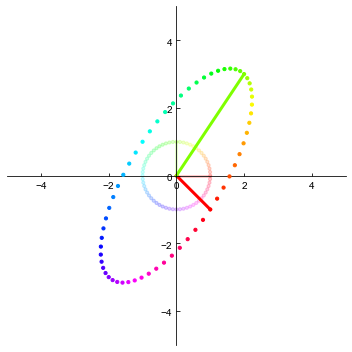

In [36]:
ax = plot_trans(V, M, V_sel, colors=colors)

# Setting the scale of x and y axis
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

## Finding and plotting eigenvalues

In [41]:
def plot_eigs(ax, M, zorder=3):
    w, v = np.linalg.eig(M)
    T = np.linspace(-100, 100, 10)
    v1 = v[:,0]
    v2 = v[:,1]
    
    X1 = v1[0]*T
    Y1 = v1[1]*T
    
    X2 = v2[0]*T
    Y2 = v2[1]*T

    ax.arrow(0, 0, w[0]*v1[0], w[0]*v1[1], width=.05, length_includes_head=True, color='k')
    ax.arrow(0, 0, v1[0], v1[1], width=.05, length_includes_head=True, color='.5')

    ax.arrow(0, 0, w[1]*v2[0], w[1]*v2[1], width=.05, length_includes_head=True, color='k')
    ax.arrow(0, 0, v2[0], v2[1], width=.05, length_includes_head=True, color='.5')
    pass

def prettyprint_eig(M):
    vals, mat = eig(M)
    for i in range(len(vals)):
        if np.imag(vals[i]) == 0.0:
            vals = np.array(vals, dtype='float')
        print(f"\tEigenvalue {i+1} is {vals[i]:.3}, with vector ({mat[0,i]:.3}, {mat[1,i]:.3})")
        
def plot_trans_w_eigs(V, M, sel=V_sel, colors=colors, ax=None):
    prettyprint_eig(M)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(5,5))
    
    # Plotting the points
    plot_points(V, colors=colors, zorder=1, alpha=.2, ax=ax)

    V2 = M @ V
    
    # Plotting the newpoints
    plot_points(V2, colors=colors, zorder=3, ax=ax)

    try:
        plot_eigs(ax, M)
    except:
        pass
    
    return(ax) 

	Eigenvalue 1 is (2+1j), with vector ((0.816+0j), (0.408+0.408j))
	Eigenvalue 2 is (2-1j), with vector ((0.816-0j), (0.408-0.408j))


(-5.0, 5.0)

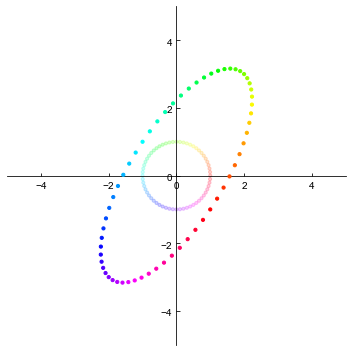

In [44]:
ax = plot_trans_w_eigs(V, M)

# Setting the scale of x and y axis
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])